# Capstone: Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# import project utils
import sys
sys.path.append('../src')

import graph_utils

## The Data: San Francisco Police Department Incident Reports

## Read the data

The dataset is available as two CSV files with historical data from 2003-2018 and 2018-Present:

* [San Franciso Police Department Incident Reports: Historical 2003 to May 2018](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry/about_data)
* [Police Department Incident Reports: 2018 to Present](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)

The current data is updated nightly and it takes a few minutes to read and convert the data to a time-series format. So, I've created a set of utilities to optimize data ingestion in the `data_utils.py`.

In [6]:
import data_utils

I periodically refresh the dataset from the [excellent DataSF site](https://www.sf.gov/departments/city-administrator/datasf) to the project `data` directoty, and generate a _clean_ input file transformed as a time-series. I will typically do this a couple of times a week, and save the output as a static comment below so I know what happened.

**Capstone Project 20.1: Initial Report and Exploratory Data Analysis (EDA)**: I'm limiting the report to only the current data for now:

* [Police Department Incident Reports: 2018 to Present](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)


In [8]:
# Convert the raw SFPD data into a cleansed data file - only to be used when refreshing from new data

current_raw_file = '../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv'
current_clean_file = '../data/incidents_clean.csv'

# Uncomment to regenerate the clean data file from raw data - normally just read the clean data as it's MUCH FASTER
# data_utils.generate_clean_csv(current_raw_file, current_clean_file, debug=True)

STATIC COMMENT: OUTPUT SAVED FROM LAST SUCCESSFULL RUN (see timestamp below):
```
Start Time: 09/13/24 16:24:59

Reading file: ../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv ... Done: 887,173 rows, 35 columns
... Formatting column names ... Done
... Creating timeseries columns: datetime and date ... 
...... Number of rows where the datetime conversion failed: 0
...... Number of rows where the date conversion failed: 0
...... Timespan: 2018-01-01 00:00:00 - 2024-09-08 19:30:00
... Done
... Setting index to datetime ... Done

Current Time: 09/13/24 16:26:17

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 887173 entries, 2023-03-13 23:41:00 to 2023-03-21 17:42:00
Data columns (total 36 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   incident_datetime                                     887173 non-null  object        
 1   incident_date                                         887173 non-null  object        
 2   incident_time                                         887173 non-null  object        
 3   incident_year                                         887173 non-null  int64         
 4   incident_day_of_week                                  887173 non-null  object        
 5   report_datetime                                       887173 non-null  object        
 6   row_id                                                887173 non-null  int64         
 7   incident_id                                           887173 non-null  int64         
 8   incident_number                                       887173 non-null  int64         
 9   cad_number                                            689019 non-null  float64       
 10  report_type_code                                      887173 non-null  object        
 11  report_type_description                               887173 non-null  object        
 12  filed_online                                          175483 non-null  object        
 13  incident_code                                         887173 non-null  int64         
 14  incident_category                                     886295 non-null  object        
 15  incident_subcategory                                  886295 non-null  object        
 16  incident_description                                  887173 non-null  object        
 17  resolution                                            887173 non-null  object        
 18  intersection                                          838341 non-null  object        
 19  cnn                                                   838341 non-null  float64       
 20  police_district                                       887173 non-null  object        
 21  analysis_neighborhood                                 838173 non-null  object        
 22  supervisor_district                                   837885 non-null  float64       
 23  supervisor_district_2012                              838198 non-null  float64       
 24  latitude                                              838341 non-null  float64       
 25  longitude                                             838341 non-null  float64       
 26  point                                                 838341 non-null  object        
 27  neighborhoods                                         821671 non-null  float64       
 28  esncag_-_boundary_file                                9413 non-null    float64       
 29  central_market/tenderloin_boundary_polygon_-_updated  117048 non-null  float64       
 30  civic_center_harm_reduction_project_boundary          114781 non-null  float64       
 31  hsoc_zones_as_of_2018-06-05                           185157 non-null  float64       
 32  invest_in_neighborhoods_(iin)_areas                   0 non-null       float64       
 33  current_supervisor_districts                          838198 non-null  float64       
 34  current_police_districts                              837437 non-null  float64       
 35  date                                                  887173 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(14), int64(5), object(16)
memory usage: 250.4+ MB
... Writing file: ../data/incidents_clean.csv (887173, 36) ... Done
Done

End Time: 09/13/24 16:26:40
```

As you can see, there are almost a million samples since 2018!

So, I then generate a few randomly sampled datasets of known percentages, to speed up the data exploration. Again only done when refreshing the dataset. Since we'll be working across multiple randomly selected datafiles, I set a global random_state value from hereon remove any randomization artifacts from one run to the next:

In [11]:
# Global settings
project_random_state = 42   # Consistent random_state

In [12]:
# Uncomment to generate the sample files

# data_utils.generate_sample_files(current_clean_file, random_state=project_random_state)

STATIC COMMENT: OUTPUT SAVED FROM LAST SUCCESSFULL RUN (see timestamp below):
```
Start Time: 09/13/24 16:26:40

Reading file: ../data/incidents_clean.csv ... Done: 887,173 rows, 37 columns
... Writing 10% sample file: ../data/incidents_clean_10_pct.csv (88717, 37) ... Done
... Writing 25% sample file: ../data/incidents_clean_25_pct.csv (221793, 37) ... Done
... Writing 50% sample file: ../data/incidents_clean_50_pct.csv (443586, 37) ... Done
... Writing 75% sample file: ../data/incidents_clean_75_pct.csv (665380, 37) ... Done
End Time: 09/13/24 16:28:05
```

In [14]:
# Which dataset to work from?
sample_file_size_pct = 100
match(sample_file_size_pct):
    case 100:
        sample_file = current_clean_file
    case 25 | 50 | 75:
        file_prefix = current_clean_file.replace('.csv', '')
        sample_file = f'{file_prefix}_{sample_file_size_pct}_pct.csv'
    case _:
        sample_file = '../data/incidents_clean_10_pct.csv'

print(f'Selected sample file: {sample_file}')

Selected sample file: ../data/incidents_clean.csv


## Preprocessing

### Remove unwanted columns

In [17]:
current_raw_data, current_clean_data = data_utils.get_clean_data_from_csv(sample_file)

Reading file: ../data/incidents_clean.csv ... Done: 887,173 rows, 37 columns
... Converting datetime and date to timeseries ... Done
... Setting index to datetime ... Done
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column not found KeyError("['Unnamed: 0'] not found in axis")
... preprocess_drop_cols: Column report_datetime dropped
... preprocess_drop_cols: Column row_id dropped
... preprocess_drop_cols: Column incident_id dropped
... preprocess_drop_cols: Column incident_number dropped
... preprocess_drop_cols: Column cad_number dropped
... preprocess_drop_cols: Column latitude dropped
... preprocess_drop_cols: Column longitude dropped
... preprocess_drop_cols: Column point dropped
... preprocess_drop_cols: Column esncag_-_boundary_file dropped
... preprocess_drop_cols: Column central_market/tenderloin_boundary_polygon_-_updated dropped
... preprocess_drop_cols: Column civic_center_harm_reduction_project_boundary dropped
... preprocess_drop_cols: Column hsoc_zones_as

In [18]:
current_raw_data.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_datetime', 'row_id', 'incident_id',
       'incident_number', 'cad_number', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'latitude', 'longitude', 'point',
       'neighborhoods', 'esncag_-_boundary_file',
       'central_market/tenderloin_boundary_polygon_-_updated',
       'civic_center_harm_reduction_project_boundary',
       'hsoc_zones_as_of_2018-06-05', 'invest_in_neighborhoods_(iin)_areas',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [19]:
current_clean_data.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [20]:
data = current_clean_data

In [21]:
data.head(2)

,incident_datetime,incident_date,incident_time,incident_year,incident_day_of_week,report_type_code,report_type_description,filed_online,incident_code,incident_category,...,intersection,cnn,police_district,analysis_neighborhood,supervisor_district,supervisor_district_2012,neighborhoods,current_supervisor_districts,current_police_districts,date
datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-13 23:41:00,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,...,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-13
2023-03-01 05:02:00,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,II,Coplogic Initial,True,6374,Larceny Theft,...,NaN,NaN,Mission,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01


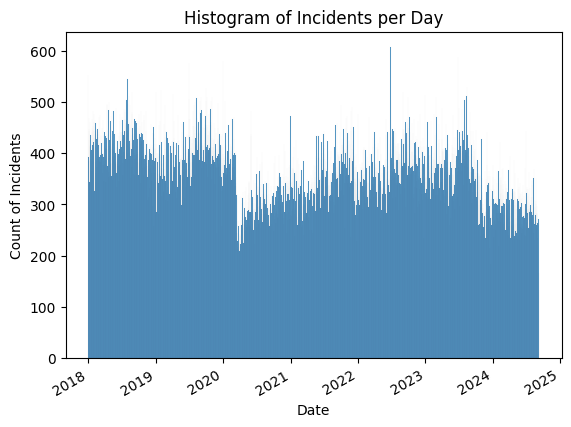

In [22]:
sns.histplot(data=data, x='date', discrete=True)
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Count of Incidents')
plt.title('Histogram of Incidents per Day')
plt.show()

In [23]:
data.resolution.value_counts(normalize=True)

resolution
Open or Active          0.802504
Cite or Arrest Adult    0.189738
Unfounded               0.005007
Exceptional Adult       0.002751
Name: proportion, dtype: float64

In [24]:
temp_copy = data.copy()

temp_copy.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [25]:
temp_copy.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [26]:
temp = temp_copy.head(1000)

In [27]:
temp.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [28]:
# graph_utils.graph_features(temp, 13, 2, figsize=(10, 15))

In [29]:
# feature_df = temp[['incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week']]
# graph_features(feature_df, 3, 2)

In [30]:
temp_copy.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [31]:
temp_copy.incident_description.head(5)

datetime
2023-03-13 23:41:00        Vehicle, Recovered, Auto
2023-03-01 05:02:00    Theft, Other Property, >$950
2023-03-13 13:16:00        Vehicle, Recovered, Auto
2023-03-13 10:59:00        Vehicle, Recovered, Auto
2023-03-14 18:44:00        Vehicle, Recovered, Auto
Name: incident_description, dtype: object

In [32]:
temp_copy.shape

(887173, 23)

In [33]:
temp_copy.incident_description.value_counts()

incident_description
Theft, From Locked Vehicle, >$950                    105701
Malicious Mischief, Vandalism to Property             29110
Battery                                               27086
Vehicle, Recovered, Auto                              26681
Vehicle, Stolen, Auto                                 25981
                                                      ...  
Hazardous Materials, Spill Load                           1
Scalping Tickets                                          1
Embezzlement, Grand Theft Public/Private Official         1
Gaming & Horse Racing (general)                           1
Accidental Burns                                          1
Name: count, Length: 852, dtype: int64

In [34]:
temp_copy.incident_category.value_counts()

incident_category
Larceny Theft                                   264308
Other Miscellaneous                              60400
Malicious Mischief                               59929
Assault                                          54925
Non-Criminal                                     51628
Burglary                                         49318
Motor Vehicle Theft                              48631
Recovered Vehicle                                36026
Fraud                                            28696
Warrant                                          26085
Lost Property                                    25882
Drug Offense                                     22801
Robbery                                          19929
Missing Person                                   19195
Suspicious Occ                                   18297
Disorderly Conduct                               15396
Offences Against The Family And Children         11764
Miscellaneous Investigation                    